<a href="https://colab.research.google.com/github/namleee1/currency_change/blob/main/currency_conversion_prediction1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install statsmodels
!pip install matplotlib
!pip install pandas
!pip install numpy

In [16]:
from google.colab import files
uploaded = files.upload()

Saving Data system POC_11Nov2024(mod).xlsx to Data system POC_11Nov2024(mod) (2).xlsx


In [23]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sn
import requests
from bs4 import BeautifulSoup
import json
import os
#Bieu dien cac sheet trong file excel
file_path = "/content/Data system POC_11Nov2024(mod) (2).xlsx"
df = pd.read_excel(file_path, sheet_name="Data- refinitiv")

In [24]:
df.isna().sum()

,0
Date,0
FEDRATE,0
DXY,0
VND,0
OMOrate,4895
SBVcentralrate,4359


In [25]:
df.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
5080,False
5081,False
5082,False
5083,False


In [26]:
df=df.fillna(method='ffill')

<ipython-input-26-c3ea836e935e>:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df=df.fillna(method='ffill')


In [27]:
df.tail(10)

,Date,FEDRATE,DXY,VND,OMOrate,SBVcentralrate
5075,2004-10-14,1.75,87.55,15.755,4.0,23152.0
5076,2004-10-13,1.75,87.88,15.745,4.0,23152.0
5077,2004-10-12,1.75,88.02,15.762,4.0,23152.0
5078,2004-10-11,1.75,87.54,15.756,4.0,23152.0
5079,2004-10-08,1.75,87.45,15.755,4.0,23152.0
5080,2004-10-07,1.75,88.34,15.756,4.0,23152.0
5081,2004-10-06,1.75,88.48,15.756,4.0,23152.0
5082,2004-10-05,1.75,88.17,15.755,4.0,23152.0
5083,2004-10-04,1.75,88.38,15.755,4.0,23152.0
5084,2004-10-01,1.75,87.63,15.745,4.0,23152.0


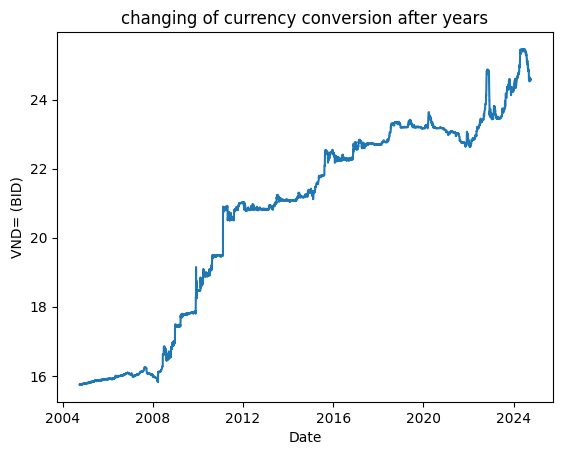

In [29]:
import matplotlib.pyplot as plt
plt.plot(df['Date'],df['VND'])
plt.xlabel('Date')
plt.ylabel('VND= (BID)')
plt.title('changing of currency conversion after years')
plt.show()

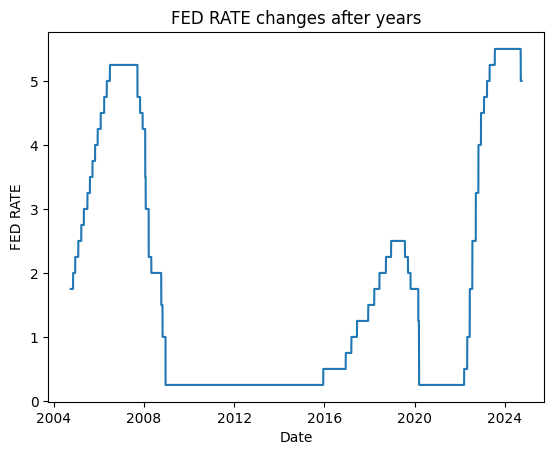

In [30]:
plt.plot(df['Date'],df['FEDRATE'])
plt.xlabel('Date')
plt.ylabel('FED RATE')
plt.title('FED RATE changes after years')
plt.show()

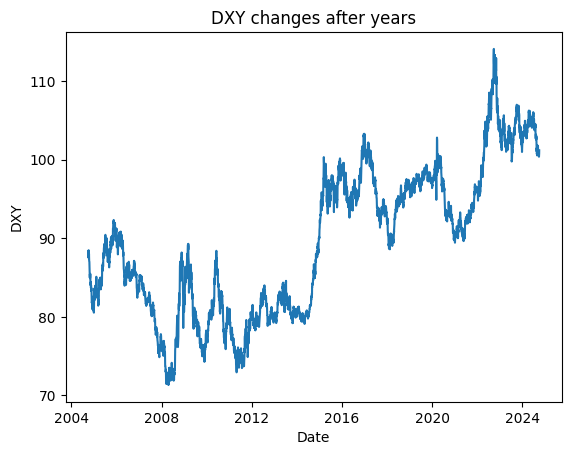

In [31]:
plt.plot(df['Date'],df['DXY'])
plt.xlabel('Date')
plt.ylabel('DXY')
plt.title('DXY changes after years')
plt.show()

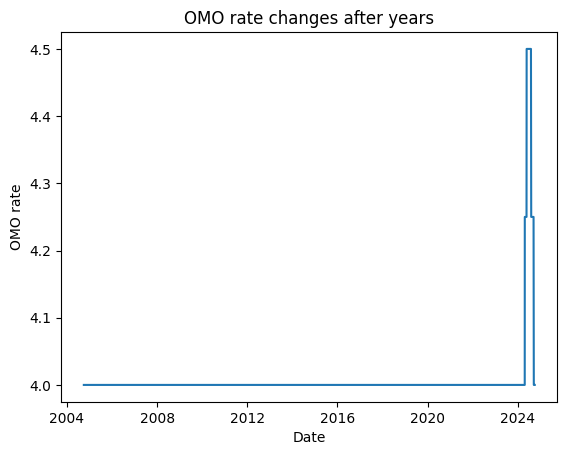

<Figure size 4000x400 with 0 Axes>

In [32]:
plt.plot(df['Date'],df['OMOrate'])
plt.xlabel('Date')
plt.ylabel('OMO rate')
plt.title('OMO rate changes after years')
plt.figure(figsize=(40,4))
plt.show()

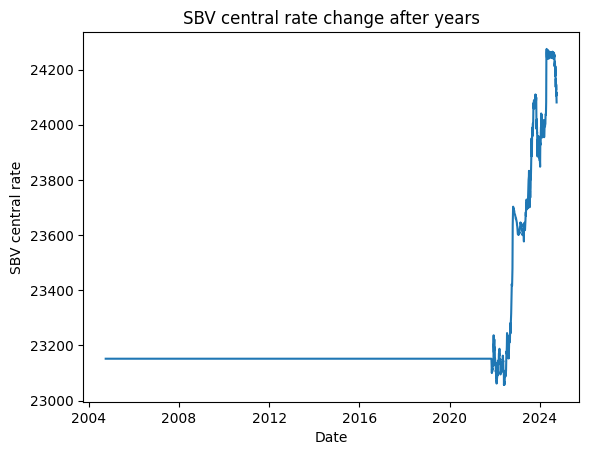

<Figure size 4000x400 with 0 Axes>

In [33]:
plt.plot(df['Date'],df['SBVcentralrate'])
plt.xlabel('Date')
plt.ylabel('SBV central rate')
plt.title('SBV central rate change after years')
plt.figure(figsize=(40,4))
plt.show()

In [34]:
name=input("Mời nhập tên chỉ số muốn xem dữ liệu lịch sử:(FEDRATE,DXY,VND,OMOrate,SBVcentralrate)")
n=int(input("Mời nhập số ngày muốn xem:"))
file_path = "/content/Data system POC_11Nov2024(mod).xlsx"
df = pd.read_excel(file_path, sheet_name=None)  # Đọc tất cả sheet
df_ref = df["Data- refinitiv"]
if name== 'FEDRATE' :
    print(df_ref['Date'].iloc[:n],df_ref['FEDRATE'].iloc[:n], sep='\n') # Print each value on a new line
elif name=='DXY' :
   print(df_ref['Date'].iloc[:n],df_ref['DXY'].iloc[:n], sep='\n') # Change here: Use df_ref to access the column
elif name=='VND' :
   print(df_ref['Date'].iloc[:n],df_ref['VND'].iloc[:n], sep='\n') # Change here: Use df_ref to access the column
elif name=='OMOrate' :
   print(df_ref['Date'].iloc[:n],df_ref['OMOrate'].iloc[:n], sep='\n') # Change here: Use df_ref to access the column
elif name=='SBVcentralrate' :
   print(df_ref['Date'].iloc[:n],df_ref['SBVcentralrate'].iloc[:n], sep='\n') # Change here: Use df_ref to access the column


Mời nhập tên chỉ số muốn xem dữ liệu lịch sử:(FEDRATE,DXY,VND,OMOrate,SBVcentralrate)FEDRATE
Mời nhập số ngày muốn xem:7
0   2024-10-01
1   2024-09-30
2   2024-09-27
3   2024-09-26
4   2024-09-25
5   2024-09-24
6   2024-09-23
Name: Date, dtype: datetime64[ns]
0    5.0
1    5.0
2    5.0
3    5.0
4    5.0
5    5.0
6    5.0
Name: FEDRATE, dtype: float64


Nhập số ngày cần dự báo: 7

📊 **Dự báo giá trị VND:** [np.float64(24.590199187809997), np.float64(24.591073802211124), np.float64(24.590935190980627), np.float64(24.59095810682665), np.float64(24.590954368156222), np.float64(24.59095498062734), np.float64(24.590954880420487)]

📈 **Xu hướng biến động:** ['Down', 'Up', 'Down', 'Up', 'Down', 'Up', 'Down']

📉 **Tỷ lệ thay đổi (%):** [np.float64(-0.019519464078072108), np.float64(0.0035567601321443315), np.float64(-0.0005636648143628979), np.float64(9.318818437097662e-05), np.float64(-1.520343539687111e-05), np.float64(2.4906358248045325e-06), np.float64(-4.074947656517886e-07)]

**Giá trị thực tế:** [24.667, 24.756, 24.768, 24.854, 24.845, 24.835, 24.844]


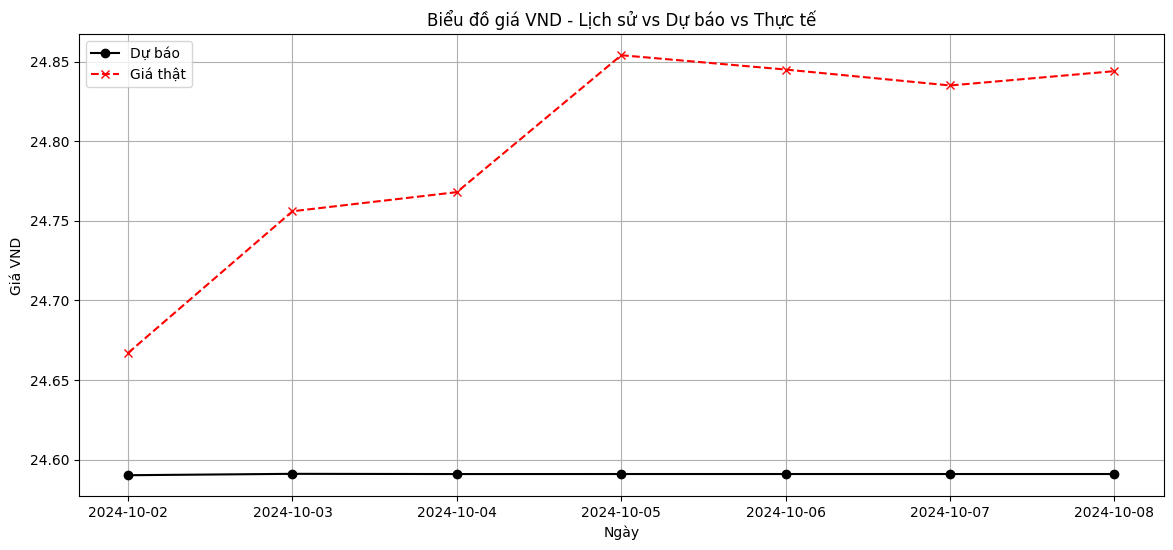

In [37]:
import pandas as pd
import numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX
import matplotlib.pyplot as plt

def train_sarima(df_ref, n):

    # Đảm bảo dữ liệu sắp xếp theo ngày
    train_values = df_ref["VND"].dropna().astype(float).sort_index()
    history = list(train_values)

    predictions = []
    labels = []
    percent_changes = []

    for _ in range(n):
        model = SARIMAX(history, order=(2,1,0))
        model_fit = model.fit(disp=False)

        forecast = model_fit.forecast(steps=1)[0]
        prev_value = history[-1]

        trend = "Up" if forecast > prev_value else "Down"
        labels.append(trend)

        percent_change = ((forecast - prev_value) / prev_value * 100) if prev_value != 0 else 0
        percent_changes.append(percent_change)

        history.append(forecast)
        predictions.append(forecast)

    return predictions, labels, percent_changes

# Đọc dữ liệu từ file Excel (chỉ đọc 1 lần)
file_path = "/content/Data system POC_11Nov2024(mod) (2).xlsx"
df = pd.read_excel(file_path, sheet_name=None)  # Đọc tất cả sheet
df_ref = df["Data- refinitiv"]
df1 = df["Sheet2"]
df_ref["Date"] = pd.to_datetime(df_ref["Date"])
df_ref.set_index("Date", inplace=True)

df1["Date"] = pd.to_datetime(df1["Date"])
df1.set_index("Date", inplace=True)

# Người dùng nhập số ngày cần dự báo
n = int(input("Nhập số ngày cần dự báo: "))

# Chạy mô hình SARIMA
predictions, labels, percent_changes = train_sarima(df_ref, n)

# Xuất kết quả
print("\n📊 **Dự báo giá trị VND:**", predictions)
print("\n📈 **Xu hướng biến động:**", labels)
print("\n📉 **Tỷ lệ thay đổi (%):**", percent_changes)

# Lấy giá trị thực tế để so sánh
df1["VND"] = df1["VND"].apply(lambda x: float(str(x).replace("\xa0", "")))
Y_TRUE = df1["VND"].iloc[:n].tolist()
print("\n**Giá trị thực tế:**", Y_TRUE)
# Xác định ngày bắt đầu dự báo
last_date = df_ref.index[0]  # Ngày cuối của tập dữ liệu huấn luyện
forecast_dates = pd.date_range(start=last_date, periods=n+1, freq='D')[1:]

# **VẼ BIỂU ĐỒ GIÁ LỊCH SỬ + DỰ BÁO + GIÁ THẬT**
plt.figure(figsize=(14, 6))

#  **Vẽ đường giá dự báo**
plt.plot(forecast_dates, predictions, color='black', linestyle='-', marker='o', label="Dự báo")

# **Vẽ đường giá thật**
plt.plot(forecast_dates, Y_TRUE, color='red', linestyle='--', marker='x', label="Giá thật")

plt.xlabel("Ngày")
plt.ylabel("Giá VND")
plt.title("Biểu đồ giá VND - Lịch sử vs Dự báo vs Thực tế")
plt.legend()
plt.grid(True)
plt.show()

In [38]:
Y_TRUE = np.array(df1["VND"].iloc[:n])
y_pred = np.array(predictions)

# Tính toán MSE
from sklearn.metrics import mean_squared_error
import numpy as np

# Import the function to calculate correlation
from scipy.stats import pearsonr

# Calculate the Pearson correlation coefficient
corr, _ = pearsonr(Y_TRUE, y_pred) # pearsonr returns the correlation and the p-value, we only need the correlation
print("Hệ số tương quan:", corr)

mse = mean_squared_error(Y_TRUE, y_pred)
print("MSE:", mse)


Hệ số tương quan: 0.7604305424569613
MSE: 0.045967283815706104


In [45]:
!pip install smtplib
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install os

ERROR: Could not find a version that satisfies the requirement smtplib (from versions: none)
ERROR: No matching distribution found for smtplib
ERROR: Could not find a version that satisfies the requirement os (from versions: none)
ERROR: No matching distribution found for os


In [51]:
import smtplib
import pandas as pd
import numpy as np
import os  # Dùng để lấy biến môi trường
from email.mime.multipart import MIMEMultipart
from email.mime.text import MIMEText
from datetime import datetime, timedelta

# 🔹 Nhập email người nhận
EMAIL_RECEIVER = input('Mời bạn nhập vào email người nhận: ')

# 🔹 Lấy mật khẩu từ biến môi trường (Không lưu trực tiếp trong code)
EMAIL_SENDER = "namltmta@gmail.com"
EMAIL_PASSWORD = "jlxk sqlk gckc eqzz"

# 🔹 Giả lập dự báo tỷ giá (dữ liệu mẫu)
forecast_dates = forecast_dates
predictions = predictions

# 🔹 Tạo nội dung email
email_content = "<h2>Dự báo tỷ giá VND-USD tuần tới</h2><table border='1' cellpadding='5'>"
email_content += "<tr><th>Ngày</th><th>Dự đoán giá</th></tr>"

for date, price in zip(forecast_dates, predictions):
    email_content += f"<tr><td>{date.strftime('%Y-%m-%d')}</td><td>{price:.2f} USD</td></tr>"

email_content += "</table>"

# 🔹 Thiết lập email
msg = MIMEMultipart()
msg['From'] = EMAIL_SENDER
msg['To'] = EMAIL_RECEIVER
msg['Subject'] = "Báo cáo dự báo tỷ giá VND-USD tuần tới"
msg.attach(MIMEText(email_content, 'html'))

# 🔹 Gửi email qua SMTP (Gmail SMTP Server)
try:
    server = smtplib.SMTP("smtp.gmail.com", 587)
    server.starttls()
    server.login(EMAIL_SENDER, EMAIL_PASSWORD)
    server.sendmail(EMAIL_SENDER, EMAIL_RECEIVER, msg.as_string())
    server.quit()
    print("✅ Email đã được gửi thành công!")
except Exception as e:
    print("❌ Lỗi khi gửi email:", str(e))


Mời bạn nhập vào email người nhận: longtaiew01@gmail.com
✅ Email đã được gửi thành công!
